In [541]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [542]:
# Q1) Which are the top 10 listings that have been listed the most number of times ? 

In [543]:
#Part 1 

In [544]:
#Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).
dfr_b = pd.read_csv("reviews_brief.csv")

In [545]:
#Shape of the data
dfr_b.shape

(1581033, 2)

In [546]:
dfr_b.head(10)

,listing_id,date
0,13913,2010-08-18
1,13913,2011-07-11
2,13913,2011-09-13
3,13913,2011-10-03
4,13913,2011-10-09
5,13913,2013-05-28
6,13913,2013-10-17
7,13913,2014-04-17
8,13913,2015-09-12
9,13913,2016-03-05


In [547]:
#No null values
dfr_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581033 entries, 0 to 1581032
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1581033 non-null  int64 
 1   date        1581033 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.1+ MB


In [548]:
#Converting from object to date
dfr_b['date'] = pd.to_datetime(dfr_b['date'])

In [549]:
# Part 2

In [550]:
#Number of unique listings and number of unique dates
dfr_b.nunique()

listing_id    65789
date           4649
dtype: int64

In [551]:
#Minimum date amongst all listings
dfr_b['date'].min()

Timestamp('2009-12-21 00:00:00')

In [552]:
#Maximum date amongst all listings
dfr_b['date'].max()

Timestamp('2023-09-06 00:00:00')

In [553]:
listing_dates_count = dfr_b.groupby('listing_id')['date'].nunique()

In [554]:
# Sort the listings based on the count in descending order
sorted_listings = listing_dates_count.sort_values(ascending=False)
top_10_listings = sorted_listings.head(10)

In [555]:
print("Top 10 Listings by Number of Times Listed:")
print(top_10_listings)

Top 10 Listings by Number of Times Listed:
listing_id
1436172     1019
2126708      929
1436177      858
21438138     855
3855375      844
2659707      797
14518189     770
5266466      766
4748665      762
2025844      718
Name: date, dtype: int64


In [556]:
#The top 10 listings by number of times listed on AirBnb help us determine the most active users on the platform
#and they can be helped further by the platform to scale their businesses and generate more revenue. 

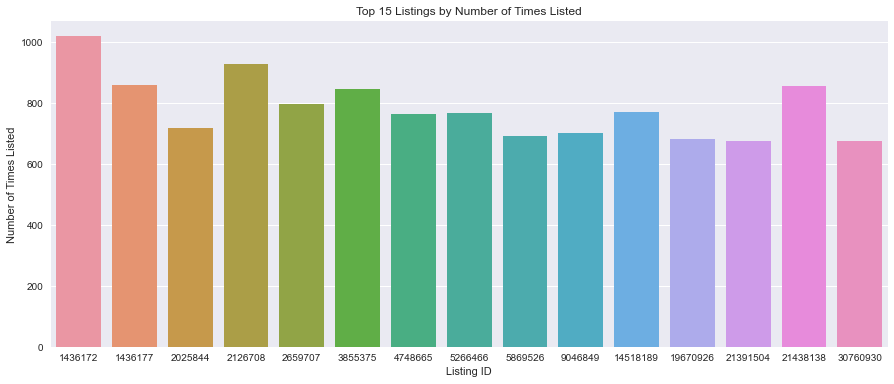

In [557]:
#Lets plot the top 15 listings

# Select the top 15 listings
top_15_listings = sorted_listings.head(15)

# Create a countplot
plt.figure(figsize=(15, 6))
sns.barplot(x=top_15_listings.index, y=top_15_listings.values)
plt.title('Top 15 Listings by Number of Times Listed')
plt.xlabel('Listing ID')
plt.ylabel('Number of Times Listed')
plt.show()

In [558]:
#Similaryly we can also find the listings that have been listed the least number of times and those can also be focussed 
#upon to make sure that they list more on the platform

In [559]:
# Q2 What percentage of listings have had repeat geusts / reviewers ? 

In [560]:
#Part 1

In [561]:
dfr_d = pd.read_csv("reviews.csv")

In [562]:
#Shape of the data
dfr_d.shape

(1581033, 6)

In [563]:
dfr_d.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."
5,13913,4847959,2013-05-28,6405442,Vera,I'm very happy to have been Alina's guest! We'...
6,13913,8142329,2013-10-17,9195551,Honi,I stayed with Alina in her flat in London for ...
7,13913,11876590,2014-04-17,5194009,Alessandro,Alina was a perfect guest and her flat is abso...
8,13913,46669566,2015-09-12,42970248,Oleh,Alina's flat is exceptional one. \r<br/>I hav...
9,13913,64559033,2016-03-05,45337884,Mo,"The House is a piece of Art , there are beauti..."


In [564]:
#There are some reviewers that have not left comments
dfr_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581033 entries, 0 to 1581032
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1581033 non-null  int64 
 1   id             1581033 non-null  int64 
 2   date           1581033 non-null  object
 3   reviewer_id    1581033 non-null  int64 
 4   reviewer_name  1581033 non-null  object
 5   comments       1580896 non-null  object
dtypes: int64(3), object(3)
memory usage: 72.4+ MB


In [565]:
dfr_d.nunique()

listing_id         65789
id               1581033
date                4649
reviewer_id      1336881
reviewer_name     156207
comments         1519862
dtype: int64

In [566]:
#Part 2

In [567]:
# Find non-unique reviewer_id for each listing_id
non_unique_reviewers_by_listing = dfr_d[dfr_d.duplicated(['listing_id', 'reviewer_id'], keep=False)]

# Count the number of listing_id with non-unique reviewer_id
num_listing_with_non_unique_reviewers = non_unique_reviewers_by_listing['listing_id'].nunique()

# Calculate the percentage relative to the total number of listing_id
total_listing_ids = dfr_d['listing_id'].nunique()
percentage = (num_listing_with_non_unique_reviewers / total_listing_ids) * 100

# Print the results
print("Number of listing_id with Non-Unique Reviewer IDs:", num_listing_with_non_unique_reviewers)
print("Percentage relative to Total Number of listing_id:", round(percentage,2))

Number of listing_id with Non-Unique Reviewer IDs: 11253
Percentage relative to Total Number of listing_id: 17.1


In [568]:
#17% of lisitings have had repeat customers

In [569]:
#Q3 In London what is the distribution of the types of rooms and in each neighborhood for each type of room what is the
# average price ?

In [570]:
#Part 1

In [571]:
dfl_b = pd.read_csv("listings_brief.csv")

In [572]:
#Shape of the data
dfl_b.shape

(87947, 18)

In [573]:
dfl_b.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,79,1,41,2022-12-11,0.26,2,360,11,NaN
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,2023-05-01,0.56,1,73,5,NaN
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42,2,216,2022-10-29,1.45,1,217,9,NaN
3,17402,Rental unit in London · ★4.76 · 3 bedrooms · 3...,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,2022-11-19,0.36,9,300,4,NaN
4,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,NaN,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,2022-09-30,0.27,1,40,2,NaN
5,93734,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,497514,William,NaN,Greenwich,51.47618,0.01442,Private room,46,4,180,2023-09-02,1.21,1,196,25,NaN
6,24328,Townhouse in London · ★4.90 · 1 bedroom · 1 be...,41759,Joe,NaN,Wandsworth,51.47072,-0.16266,Entire home/apt,250,2,96,2022-07-19,0.62,1,0,0,NaN
7,93783,Rental unit in London · ★4.73 · 2 bedrooms · 3...,502496,Darshi Rowan And Tara,NaN,Westminster,51.51881,-0.19650,Entire home/apt,371,5,24,2023-05-29,0.16,1,266,3,NaN
8,25123,Home in Barnet · ★4.78 · 1 bedroom · 1 bed · 1...,103583,Grace,NaN,Barnet,51.57438,-0.21081,Private room,29,10,129,2020-03-15,0.79,3,0,0,NaN
9,94138,Rental unit in Poplar · ★4.85 · 1 bedroom · 1 ...,503548,Carl,NaN,Tower Hamlets,51.52764,-0.05293,Entire home/apt,75,2,42,2020-03-05,0.64,1,0,0,NaN


In [574]:
#neighborhood group and license have a lot of null values
dfl_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87947 entries, 0 to 87946
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              87947 non-null  int64  
 1   name                            87947 non-null  object 
 2   host_id                         87947 non-null  int64  
 3   host_name                       87941 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   87947 non-null  object 
 6   latitude                        87947 non-null  float64
 7   longitude                       87947 non-null  float64
 8   room_type                       87947 non-null  object 
 9   price                           87947 non-null  int64  
 10  minimum_nights                  87947 non-null  int64  
 11  number_of_reviews               87947 non-null  int64  
 12  last_review                     

In [575]:
dfl_b.nunique()

id                                87947
name                              21357
host_id                           53395
host_name                         14976
neighbourhood_group                   0
neighbourhood                        33
latitude                          43097
longitude                         52917
room_type                             4
price                              1403
minimum_nights                      118
number_of_reviews                   488
last_review                        3023
reviews_per_month                   944
calculated_host_listings_count       92
availability_365                    366
number_of_reviews_ltm               153
license                               1
dtype: int64

In [576]:
#Part 2

In [577]:
dfl_b['room_type'].value_counts()

Entire home/apt    54576
Private room       32711
Shared room          441
Hotel room           219
Name: room_type, dtype: int64

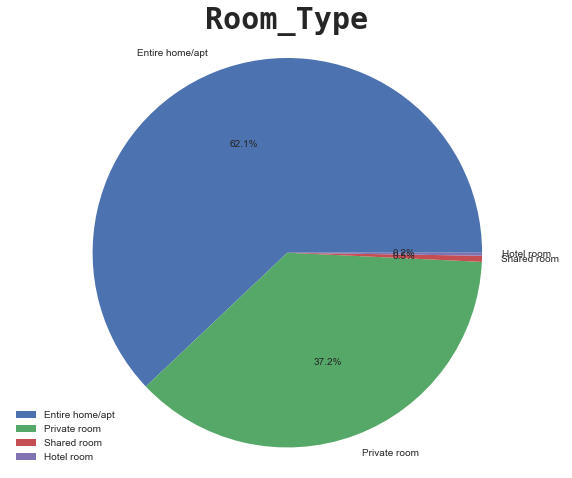

In [578]:
ssn = dfl_b['room_type'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize = (10, 8))
plt.pie(ssn.values, labels = ssn.index, autopct = '%1.1f%%')
plt.title('Room_Type', fontdict = {'fontname' : 'Monospace','fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

In [579]:
# Group by 'neighbourhood' and 'room_type' and calculate the average price
average_price_by_neighbourhood_room_type = dfl_b.groupby(['neighbourhood', 'room_type'])['price'].mean()

In [580]:
# Resetting the index for a cleaner result
average_price_by_neighbourhood_room_type = average_price_by_neighbourhood_room_type.reset_index()

In [581]:
# Print the result
print("Average Price by Neighbourhood and Room Type:")
print(average_price_by_neighbourhood_room_type)

Average Price by Neighbourhood and Room Type:
            neighbourhood        room_type       price
0    Barking and Dagenham  Entire home/apt  454.200000
1    Barking and Dagenham     Private room   60.693878
2    Barking and Dagenham      Shared room   89.400000
3                  Barnet  Entire home/apt  186.717563
4                  Barnet       Hotel room   89.000000
..                    ...              ...         ...
111            Wandsworth      Shared room  117.071429
112           Westminster  Entire home/apt  357.428904
113           Westminster       Hotel room  447.840909
114           Westminster     Private room  188.632210
115           Westminster      Shared room  236.730769

[116 rows x 3 columns]


In [582]:
#Q4 What is the distribution of minimum number of nights and average price per minimum number of nights ?

In [583]:
#Part 2

In [584]:
dfl_b['minimum_nights'].value_counts()

1      25886
2      21704
3      15768
5       5998
4       5603
       ...  
64         1
69         1
94         1
85         1
184        1
Name: minimum_nights, Length: 118, dtype: int64

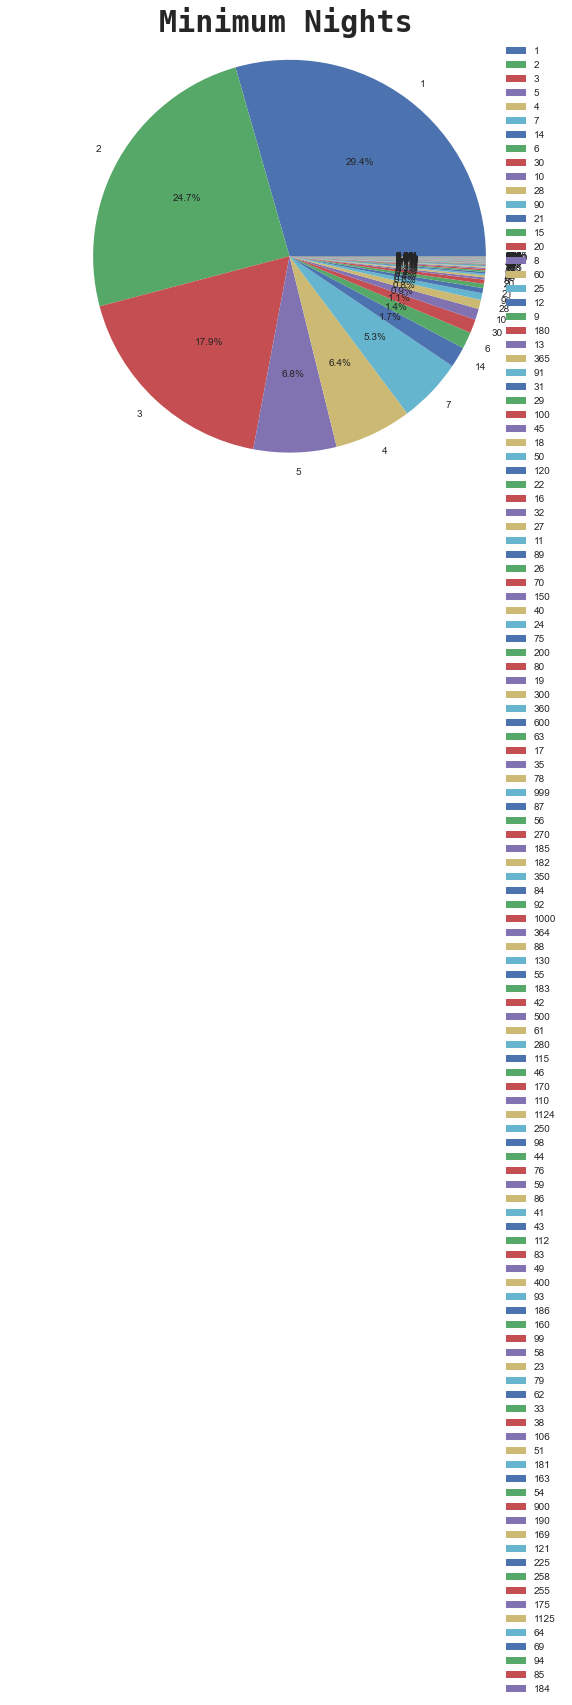

In [585]:
ssn = dfl_b['minimum_nights'].value_counts()
plt.style.use('seaborn')
plt.figure(figsize = (10, 8))
plt.pie(ssn.values, labels = ssn.index, autopct = '%1.1f%%')
plt.title('Minimum Nights', fontdict = {'fontname' : 'Monospace','fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

In [586]:
#Around 91% of AriBnb take bookings for 7 nights or less
len(dfl_b[dfl_b['minimum_nights'] <= 7]) / len(dfl_b) * 100 

91.9212707653473

In [587]:
# Filter the DataFrame for minimum number of nights less than or equal to 7
filtered_df = dfl_b[dfl_b['minimum_nights'] <= 7]

In [588]:
# Calculate the average price per minimum number of nights
average_price_per_night = filtered_df.groupby('minimum_nights')['price'].mean()

In [589]:
# Print the result
print("Average Price per Minimum Number of Nights (<= 7):")
print(average_price_per_night)

Average Price per Minimum Number of Nights (<= 7):
minimum_nights
1    148.652669
2    165.908588
3    201.078387
4    191.834374
5    247.412304
6    183.832093
7    237.864784
Name: price, dtype: float64


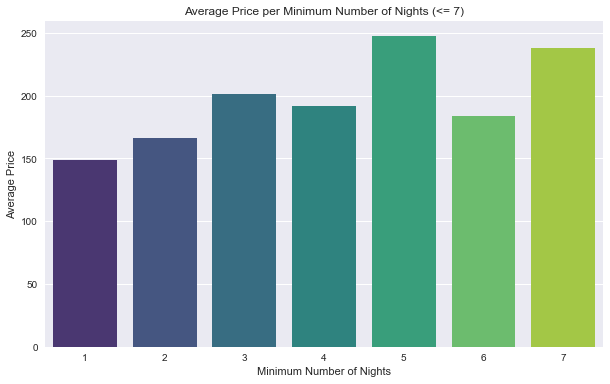

In [590]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='minimum_nights', y='price', data=average_price_per_night.to_frame().reset_index(), palette="viridis")
plt.title('Average Price per Minimum Number of Nights (<= 7)')
plt.xlabel('Minimum Number of Nights')
plt.ylabel('Average Price')
plt.show()

In [591]:
#As minimum number of nights increase the Aaverage price also increases with some fluctations. 5 nights booking has the 
# highest price

In [592]:
#Q5 What is the average number of reviews per neighrborhood and are high rated neighborhoods also the most expensive ones ?

In [593]:
#Part 2

In [594]:
# Calculate the average number of reviews per neighborhood
average_reviews_by_neighborhood = dfl_b.groupby('neighbourhood')['number_of_reviews'].mean()

In [595]:
# Print the top 5 neighborhoods with the highest average number of reviews
top_5_neighborhoods = average_reviews_by_neighborhood.sort_values(ascending=False).head(5)
print("Top 5 Neighborhoods with Highest Average Number of Reviews:")
print(top_5_neighborhoods)

Top 5 Neighborhoods with Highest Average Number of Reviews:
neighbourhood
City of London          27.559701
Camden                  24.888657
Richmond upon Thames    23.880668
Hillingdon              22.100811
Lambeth                 21.043988
Name: number_of_reviews, dtype: float64


In [596]:
#Calculate average price per neighborhood
average_price_by_neighborhood = dfl_b.groupby('neighbourhood')['price'].mean()

In [597]:
# Print the top 5 neighborhoods with the highest price
top_5_neighborhoods = average_price_by_neighborhood.sort_values(ascending=False).head(5)
print("Top 5 Neighborhoods with Highest prices:")
print(top_5_neighborhoods)

Top 5 Neighborhoods with Highest prices:
neighbourhood
Westminster               320.591373
Kensington and Chelsea    307.432795
Barking and Dagenham      245.840426
City of London            243.722015
Camden                    203.288171
Name: price, dtype: float64


In [598]:
import scipy.stats
def get_correlation(series1, series2):
    # Check if the series are normally distributed
    _, p_value1 = scipy.stats.shapiro(series1)
    _, p_value2 = scipy.stats.shapiro(series2)
    
    # Set the correlation method based on normality tests
    if p_value1 > 0.05 and p_value2 > 0.05:  # If both are normally distributed
        correlation_coef, _ = scipy.stats.pearsonr(series1, series2)
        correlation_method = 'Pearson'
    else:
        correlation_coef, _ = scipy.stats.spearmanr(series1, series2)
        correlation_method = 'Spearman'
    
    return correlation_coef, correlation_method

In [599]:
get_correlation(average_reviews_by_neighborhood, average_price_by_neighborhood)

(0.4632352941176471, 'Spearman')

In [600]:
#0.46 means a moderate correlation exists between the number reviews and the price of neighborhoods. So yes the most high
# rated neighborhoods are also the most expensive ones

In [601]:
#Q6 What is the average number of reviews per month that a listing gets and what are the top five listings by reviews per 
# month ?

In [602]:
# Calculate the average number of reviews per month for all listings
average_reviews_per_month_all_listings = dfl_b['reviews_per_month'].mean()

In [603]:
# Print the result
print("Average Number of Reviews per Month for All Listings:", round(average_reviews_per_month_all_listings,2))

Average Number of Reviews per Month for All Listings: 1.01


In [604]:
#Top 5 listings by number of reivews per month

In [605]:
# Find the top 5 listings sorted by reviews per month
top_5_listings_by_reviews_per_month = dfl_b.sort_values(by='reviews_per_month', ascending=False).head(5)

# Print the top 5 listings
print("\nTop 5 Listings by Reviews per Month:")
print(top_5_listings_by_reviews_per_month[['id', 'reviews_per_month']])


Top 5 Listings by Reviews per Month:
                       id  reviews_per_month
42985            47408549              50.25
72685  879651617475418286              41.79
40309            43120947              32.80
29781            30760930              27.38
43008            47438714              24.00


In [606]:
#Q7 How does the price, number of reviews and minumum nights vary by room type ?

In [607]:
#Part 2 

In [608]:
# Descriptive statistics by room type
room_type_stats = dfl_b.groupby('room_type').agg({
    'price': 'mean',
    'number_of_reviews': 'mean',
    'minimum_nights': 'mean'
}).reset_index()

In [609]:
# Print descriptive statistics
print("Descriptive Statistics by Room Type:")
print(room_type_stats)

Descriptive Statistics by Room Type:
         room_type       price  number_of_reviews  minimum_nights
0  Entire home/apt  230.167198          14.356146        6.206941
1       Hotel room  256.095890          27.570776        1.844749
2     Private room  100.231207          23.945829        4.672893
3      Shared room  119.716553          18.598639        4.712018


Text(0, 0.5, 'Average Price')

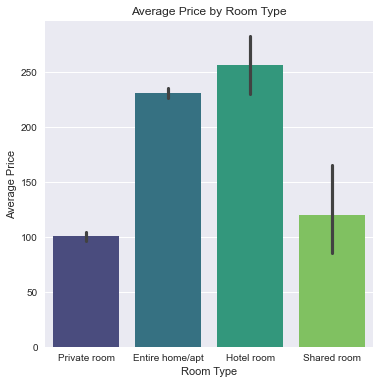

In [610]:
# Visualize the data
plt.figure(figsize=(20, 6))

# Price by room type
plt.subplot(1, 3, 1)
sns.barplot(x='room_type', y='price', data=dfl_b, palette='viridis')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Number of Reviews')

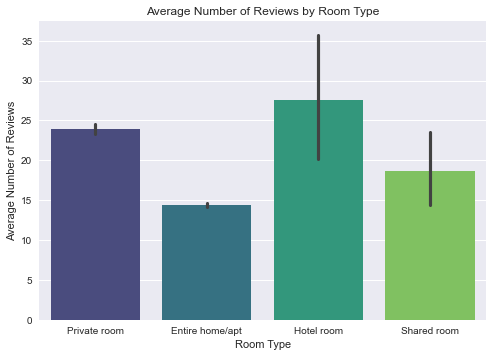

In [611]:
# Number of reviews by room type
sns.barplot(x='room_type', y='number_of_reviews', data=dfl_b, palette='viridis')
plt.title('Average Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Reviews')

Text(0, 0.5, 'Average Minimum Nights')

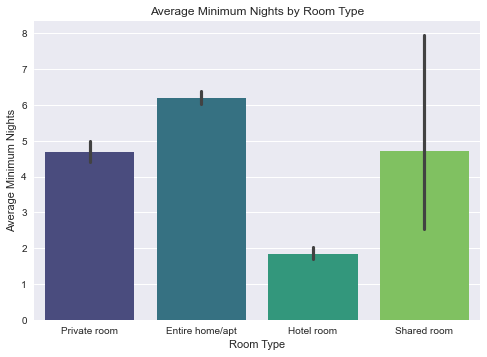

In [612]:
# Minimum nights by room type
sns.barplot(x='room_type', y='minimum_nights', data=dfl_b, palette='viridis')
plt.title('Average Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')

In [613]:
# Entire home / appratments are twice as expensive as private and shared rooms and have the biggest minimum number of
# nights required. Private and shares rooms are the cheapest and both have 4 as the minimum number of nights 

In [614]:
#Q8 What are the most important predictor variables that determine the number of reviews for a listing ? 

In [615]:
#Part 1 Data cleaning and encoding

In [616]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from category_encoders import TargetEncoder

# Assuming df is your DataFrame
dfl_b1 = pd.read_csv("listings_brief.csv")

In [617]:
# Drop unnecessary variables
dfl_b1 = dfl_b1.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group','license'], axis=1)

In [618]:
dfl_b1.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Islington,51.56861,-0.11270,Private room,79,1,41,2022-12-11,0.26,2,360,11
1,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,2023-05-01,0.56,1,73,5
2,Wandsworth,51.44201,-0.18739,Private room,42,2,216,2022-10-29,1.45,1,217,9
3,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,2022-11-19,0.36,9,300,4
4,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,2022-09-30,0.27,1,40,2


In [619]:
# Convert 'last_review' column to datetime
dfl_b1['last_review'] = pd.to_datetime(dfl_b1['last_review'])

# Add a new column for the difference between '2023-09-06' and 'last_review'
dfl_b1['days_since_last_review'] = (pd.to_datetime('2023-09-06') - dfl_b1['last_review']).dt.days

# Drop the 'last_review' column
dfl_b1 = dfl_b1.drop('last_review', axis=1)

In [620]:
# Find the number of null values per column
null_counts = dfl_b1.isnull().sum()

# Display the number of null values per column
print("Number of Null Values per Column:")
print(null_counts)

Number of Null Values per Column:
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 22158
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
days_since_last_review            22158
dtype: int64


In [621]:
#Add a feature difference in time between 06 sept 2023 and last review 

In [622]:
# 25% of listings ahve no reviews per month .
22158 / len(dfl_b1) * 100

25.1947195469999

In [623]:
# Delete rows with null values
dfl_b1.dropna(inplace = True)

In [624]:
# Target encode string variables
encoder = TargetEncoder()
dfl_b1[['neighbourhood', 'room_type']] = encoder.fit_transform(dfl_b1[['neighbourhood', 'room_type']], dfl_b1['number_of_reviews'])

In [625]:
# Split the data into features (X) and target variable (y)
X = dfl_b1.drop('number_of_reviews', axis=1)
y = dfl_b1['number_of_reviews']

In [626]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [627]:
# Part 2 appylying the regression

In [628]:
# Initialize XGBoost regressor
model = XGBRegressor()

In [629]:
# Fit the model to the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [630]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [631]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 807.7975923642689


In [632]:
# Calculate MAPE
ape = np.abs((y_test - y_pred) / y_test)
mape = np.mean(ape) * 100

print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 101.32747179496432


In [633]:
# Feature importance
feature_importance = model.feature_importances_
features = X.columns


In [634]:
# Display feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                           Feature  Importance
9            number_of_reviews_ltm    0.470368
6                reviews_per_month    0.117524
10          days_since_last_review    0.091050
3                        room_type    0.083666
7   calculated_host_listings_count    0.057207
2                        longitude    0.043941
8                 availability_365    0.032633
4                            price    0.029921
5                   minimum_nights    0.024944
1                         latitude    0.024547
0                    neighbourhood    0.024199


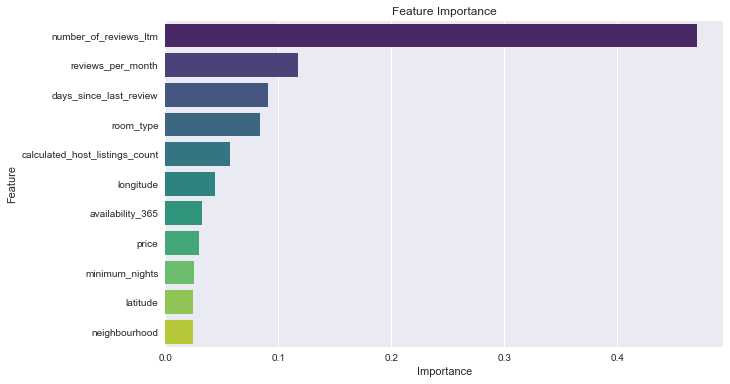

In [635]:
# Display feature importance in a bar plot
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

In [636]:
# This gives us the most importna features on which the number of reviews of a listing depend on
# Please note I've used XGBoost as it is due to paucity of time. But it can be optimized a great deal by hyperparamter
# tuning, more feature engineering and the loss brought down and then a more accurate feature importance graph can be shown.

#I used XGboost but LightGBM and bagging could also have been used

In [637]:
#Q9 Find any correaltions that you can from the reviews dataset ?

In [638]:
#Part 1

In [639]:
dfl_b.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,79,1,41,2022-12-11,0.26,2,360,11,NaN
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,2023-05-01,0.56,1,73,5,NaN
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42,2,216,2022-10-29,1.45,1,217,9,NaN
3,17402,Rental unit in London · ★4.76 · 3 bedrooms · 3...,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,2022-11-19,0.36,9,300,4,NaN
4,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,NaN,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,2022-09-30,0.27,1,40,2,NaN


In [640]:
dfl_br = dfl_b.drop(['id','host_id','neighbourhood_group','license'], axis=1)

In [641]:
dfl_br.head(5)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Rental unit in Islington · ★4.80 · 1 bedroom ·...,Alina,Islington,51.56861,-0.11270,Private room,79,1,41,2022-12-11,0.26,2,360,11
1,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Philippa,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,2023-05-01,0.56,1,73,5
2,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,Dee Dee,Wandsworth,51.44201,-0.18739,Private room,42,2,216,2022-10-29,1.45,1,217,9
3,Rental unit in London · ★4.76 · 3 bedrooms · 3...,Liz,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,2022-11-19,0.36,9,300,4
4,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Sarah,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,2022-09-30,0.27,1,40,2


In [642]:
#Part 2

In [643]:
#Check if the numerical columns of interest are nornmally distributed or not ?


from scipy.stats import normaltest
# Extract numerical columns
numerical_columns = dfl_br.select_dtypes(include=['float64', 'int64']).columns

# Check for normal distribution
for col in numerical_columns:
    stat, p_value = normaltest(dfl_br[col])
    print(f"{col} - Normality Test: {'Normally Distributed' if p_value > 0.05 else 'Not Normally Distributed'}")

latitude - Normality Test: Not Normally Distributed
longitude - Normality Test: Not Normally Distributed
price - Normality Test: Not Normally Distributed
minimum_nights - Normality Test: Not Normally Distributed
number_of_reviews - Normality Test: Not Normally Distributed
reviews_per_month - Normality Test: Not Normally Distributed
calculated_host_listings_count - Normality Test: Not Normally Distributed
availability_365 - Normality Test: Not Normally Distributed
number_of_reviews_ltm - Normality Test: Not Normally Distributed


<AxesSubplot:>

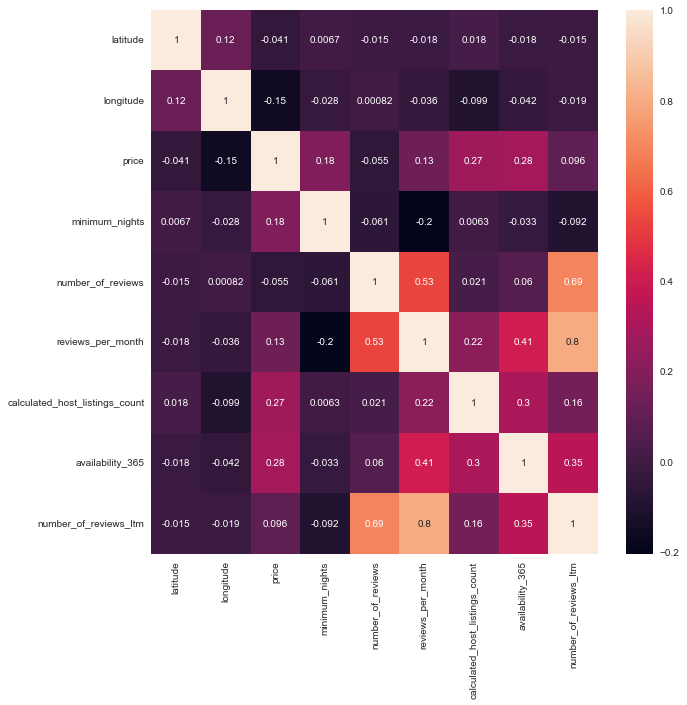

In [644]:
#As most columns are not mumerically dsitributed so we use spearman correlation

fig, ax = plt.subplots(figsize=(10, 10))
Var_Corr = dfl_br.corr(method = 'spearman')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax=ax)


In [645]:
#Strong correaltion : 1) reviews per month and number of review ltm
#                     2) number of reviews number of reviews ltm

In [646]:
#Moderate correaltion : 1) reviews per month and availability 365
#                       2) reviews per month and number of reviews
#                       3) calculated host listing count and availability 365

In [647]:
# We find a lot of weak postiive and negative correlations

In [648]:
#Q10 Given a budget threshold for a guest find the best neighborhoods that are in that budget and also have high reviews?
# Within each such neighborhood also give some information about the hosts fulfilling the budget criteria. 

In [649]:
#Part 2

In [650]:
# Define affordability based on average price
affordable_threshold = 150  # Adjust this threshold based on your definition of affordability

# Filter neighborhoods with average price below the threshold
affordable_neighborhoods = dfl_b.groupby('neighbourhood')['price'].mean().loc[lambda x: x < affordable_threshold].index

# Filter neighborhoods with a high number of reviews.. at least 100 reviews we use in this case
high_review_neighborhoods = dfl_b.groupby('neighbourhood')['number_of_reviews'].sum().loc[lambda x: x > 100].index

# Find neighborhoods that satisfy both criteria
selected_neighborhoods = set(affordable_neighborhoods) & set(high_review_neighborhoods)


# Display the selected neighborhoods
print("Neighborhoods that are affordable and have high number of reviews:")
print(selected_neighborhoods)

Neighborhoods that are affordable and have high number of reviews:
{'Greenwich', 'Bromley', 'Lewisham', 'Sutton', 'Bexley', 'Havering', 'Redbridge', 'Waltham Forest', 'Ealing', 'Enfield', 'Haringey', 'Hackney', 'Hillingdon', 'Kingston upon Thames', 'Harrow', 'Tower Hamlets', 'Lambeth', 'Croydon'}


In [651]:
# Filter listings within the selected neighborhoods and affordability threshold
selected_listings = dfl_b.loc[(dfl_b['neighbourhood'].isin(selected_neighborhoods)) & (dfl_b['price'] < affordable_threshold)]

# Display information about the selected listings
print("Listings within the selected neighborhoods and affordability threshold:")
print(selected_listings[['id', 'name','neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews']])

Listings within the selected neighborhoods and affordability threshold:
                       id                                               name  \
5                   93734  Condo in London · ★4.62 · 1 bedroom · 1 bed · ...   
9                   94138  Rental unit in Poplar · ★4.85 · 1 bedroom · 1 ...   
11                  94662  Rental unit in Lewisham · ★4.90 · 2 bedrooms ·...   
14                  97506  Rental unit in Lambeth · ★4.86 · 1 bedroom · 1...   
15                  34935  Rental unit in Greater London · ★4.54 · 1 bedr...   
...                   ...                                                ...   
87919  973323941642692458  Rental unit in Greater London · ★New · 1 bedro...   
87921  973327806433458614  Rental unit in Greater London · ★New · 1 bedro...   
87925  973351809301194761  Rental unit in Greater London · ★New · 1 bedro...   
87926  973353424429140696  Rental unit in Greater London · ★New · 1 bedro...   
87930  973448499788404098  Rental unit in Greate